<a href="https://colab.research.google.com/github/lookee/seir-model/blob/master/SEIR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Virus Spread Simulator Construction Kit**

[Luca Amore](https://www.lucaamore.com)

![COVID-19](https://github.com/lookee/seir-model/raw/master/img/virus.jpg?raw=true)

[GITHUB](https://github.com/lookee/seir-model)

Based on the article:

[Modeling How Infectious Diseases like Coronavirus Spread](https://triplebyte.com/blog/modeling-infectious-diseases) by Jennifer Ciarochi

**Compartmental Modeling of Viruses**

The SEIR model can be schematically represented by:

![SEIR](https://github.com/lookee/seir-model/blob/master/img/SEIR_block_model.png?raw=true)


**Model of a "Toy Virus"**

![Block Model of a Simple Virus](https://github.com/lookee/seir-model/blob/master/img/SEIR_example_block_model.png?raw=true)

**Differential Equations System of a "Toy Virus"**

\begin{cases} 
\frac{\partial s(t)}{\partial t} = -\lambda s(t)i(t) \\
\frac{\partial e(t)}{\partial t} = \lambda s(t)i(t) - \frac{e(t)} {\xi} \\ 
\frac{\partial i(t)}{\partial t} = \frac{h} {\xi} e(t) -\frac{i(t)} {\mu}  \\ 
\frac{\partial r(t)}{\partial t} = \frac{h} {\mu} i(t) \\
\end{cases}

In [0]:
########################################
### WRITE YOUR VIRUS CODE IN THIS BLOCK
########################################

# YOUR VIRUS PARAMETERS
force_of_infection = 1. / (1. * 10e6) # 1 / day person
incubation_rate = 7. # days
recovery_rate = 10. # days
h = 1. # step (1 day)

# YOUR VIRUS MODEL
def virus (s, e, i, r ,t):

  # basic virus model
  s2e = force_of_infection * s * i / h
  e2i = h / incubation_rate * e
  i2r = h / recovery_rate * i
  dsdt = - s2e
  dedt = + s2e - e2i
  didt = + e2i - i2r
  drdt = + i2r
  
  return (dsdt, dedt, didt, drdt)


In [0]:
###################################
# PUT HERE YOUR STARTING CONDITIONS
###################################

s0 = 10e6 - 1e2 - 3e6 # susceptible
e0 = 0 # exposed
i0 = 1e3 # infectious
r0 = 3e6 # recovered / immune

# days of simulation (h = 1)
days = 100

In [0]:
###################################
# SIMULATOR
###################################

import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

# virus model wrapper
def model(x,t):
  (s, e, i, r) = (x[0], x[1], x[2], x[3]);
  return virus(s, e, i, r, t)

# differential equations system solver
t = np.linspace(0, days, days)
x0 = [s0, e0, i0, r0]
x = odeint(model, x0, t)

# series
(s, e, i, r) = (x[:,0], x[:,1], x[:,2], x[:,3]) 

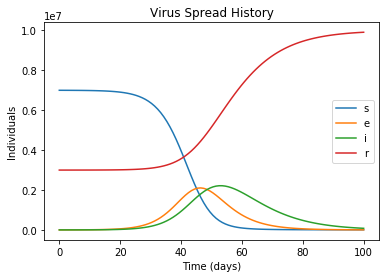

In [179]:
###################################
# VIRUS SPREAD HISTORY
###################################

plt.plot(t,s, label='s')
plt.plot(t,e, label='e')
plt.plot(t,i, label='i')
plt.plot(t,r, label='r')
plt.title("Virus Spread History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

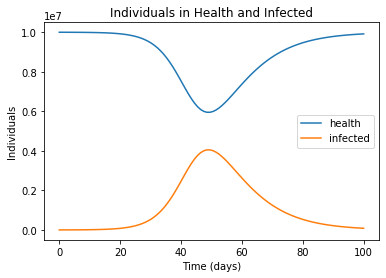

In [180]:
###################################
# INDIVIDUAL HEALTH HISTORY
###################################

plt.plot(t,s + r, label='health')
plt.plot(t,e + i, label='infected')
plt.title("Individuals in Health and Infected")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

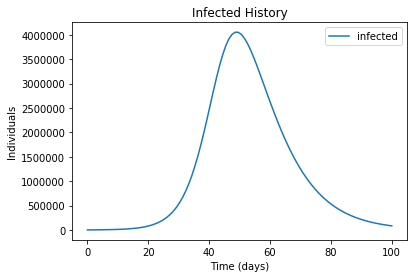

In [183]:
###################################
# INFECTED HISTORY
###################################

plt.plot(t,e + i, label='infected')
plt.title("Infected History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

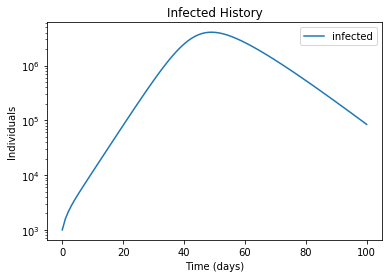

In [182]:
###################################
# INFECTED HISTORY (LOG)
###################################

plt.semilogy(t,e + i, label='infected')
plt.title("Infected History")
plt.xlabel("Time (days)")
plt.ylabel("Individuals")
plt.legend()
plt.show()

**References**

[Jennifer Ciarochi, 2020. "Modeling How Infectious Diseases like Coronavirus Spread"](https://triplebyte.com/blog/modeling-infectious-diseases)

[Blackwood, Julie C., and Lauren M. Childs. 2018. “An Introduction to Compartmental Modeling for the Budding Infectious Disease Modeler.”](https://www.tandfonline.com/doi/full/10.1080/23737867.2018.1509026)

[Desai, Rishi. n.d. “Understanding R Nought.” Khan Academy](https://www.khanacademy.org/science/health-and-medicine/current-issues-in-health-and-medicine/ebola-outbreak/v/understanding-r-nought?modal=1)

[Simulate HIV Infection](https://apmonitor.com/pdc/index.php/Main/SimulateHIV)

[Simulate Coupled Differential Equations in Python](https://youtu.be/zRMmiBMjP9o)

[Differential Equation in Action. Udacity Course](https://www.udacity.com/course/differential-equations-in-action--cs222)

In [0]:
##############################################################################
#    Copyright (C) 2020 Luca Amore <luca.amore at gmail.com>
#
#    Virus Spread Simulator Construction Kit
#    is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    frk is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with frk.  If not, see <http://www.gnu.org/licenses/>.
##############################################################################